# 爬虫基础(二)

本课学习目标：

- 学会使用request发送post请求。
- 使用xpath库对网页进行解析。
- 使用cookie来应对反爬虫等限制。

## 动态获取数据


http请求有两种最基本的请求方式:
- get: 获取数据，响应结果一般是静态的数据
- post: 发送数据，响应结果一般是动态的数据，根据请求的数据发生变化。

上节课我们简单学习了如何使用get请求获取网络数据。比如最简单的一个网络请求：

```python
import requests

url = "https://www.runoob.com/"

response = requests.get(url)

print(response.status_code)
print(response.text)

```

以及设置`headers`参数来发送请求。


`requests` 库的 `post()` 函数用于发送HTTP POST请求。POST请求通常用于向服务器提交数据，例如提交表单数据、创建资源、上传文件等。以下是对 `requests.post()` 函数的详细解释和用法示例：

### `requests.post()` 函数的基本用法：

```python
import requests

response = requests.post(url, data=None, json=None, **kwargs)
```

- `url`（必需）：要请求的URL地址。
- `data`（可选）：要发送的数据，通常是一个字典、字符串或字节序列。用于提交表单数据或其他需要发送的数据。
- `json`（可选）：要发送的JSON数据，通常用于与RESTful API交互。
- `**kwargs`（可选）：其他可选参数，用于定制请求，如设置请求头、代理、身份验证等。

### 返回值：

`requests.post()` 函数返回一个包含HTTP响应信息的`Response`对象，你可以通过该对象来查看和处理响应的各种属性和内容。

### 常见的 `Response` 属性和方法：

- `response.status_code`：HTTP响应的状态码，例如200表示成功，404表示未找到，500表示服务器内部错误等。
- `response.headers`：响应头的字典，包含了HTTP头部信息。
- `response.text`：以字符串形式返回响应内容，通常用于处理文本响应。
- `response.content`：以字节形式返回响应内容，通常用于处理二进制响应（如图片、文件等）。
- `response.json()`：将响应内容解析为JSON格式。
- `response.raise_for_status()`：如果响应状态码表示失败（如4xx或5xx），则会引发异常。

### 示例：

```python
import requests

# 发送简单的POST请求
data = {"username": "user1", "password": "pass123"}
response = requests.post("https://example.com/login", data=data)
print("Status Code:", response.status_code)
print("Response Content:", response.text)

# 发送JSON数据的POST请求
json_data = {"name": "John", "age": 30}
response = requests.post("https://jsonplaceholder.typicode.com/posts", json=json_data)
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

# 上传文件的POST请求
files = {'file': open('example.txt', 'rb')}
response = requests.post("https://example.com/upload", files=files)
print("Status Code:", response.status_code)
```

上述示例演示了如何使用 `requests.post()` 函数发送POST请求，提交数据、JSON数据和文件上传。你可以根据具体的需求和目标服务器的API文档来构造不同类型的POST请求。要确保处理响应时考虑到错误处理和异常处理，以保证代码的健壮性。


## 反爬虫技术

https://juejin.cn/post/7145268210126815239

反爬虫相关技术
在了解具体的反爬虫措施之前，我们先介绍下反爬虫的定义和意义，限制爬虫程序访问服务器资源和获取数据的行为称为反爬虫。爬虫程序的访问速率和目的与正常用户的访问速率和目的是不同的，大部分爬虫会无节制地对目标应用进行爬取，这给目标应用的服务器带来巨大的压力。爬虫程序发出的网络请求被运营者称为“垃圾流量”。开发者为了保证服务器的正常运转或降低服务器的压力与运营成本，不得不使出各种各样的技术手段来限制爬虫对服务器资源的访问。
所以为什么要做反爬虫，答案是显然的，爬虫流量会提升服务器的负载，过大的爬虫流量会影响到服务的正常运转，从而造成收入损失，另一方面，一些核心数据的外泄，会使数据拥有者失去竞争力。
常见的反爬虫手段，如图7所示。主要包含文本混淆、页面动态渲染、验证码校验、请求签名校验、大数据风控、js混淆和蜜罐等，其中文本混淆包含css偏移、图片伪装文本、自定义字体等，而风控策略的制定则往往是从参数校验、行为频率和模式异常等方面出发的。

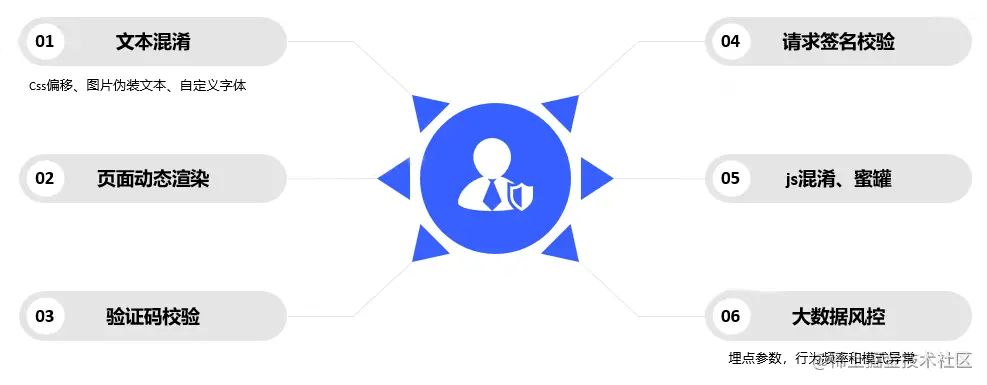